In [30]:
import pandas as pd
import numpy as np

In [31]:
airportData = pd.read_csv('project1.csv')
airportData.columns =['Airlines','Status',airportData.columns[2],airportData.columns[3],airportData.columns[4],airportData.columns[5],airportData.columns[6]]

#### Airport Data with raw headers

In [32]:
airportData

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


#### Renaming Headers and dropping the NaN row

In [33]:
airportData = airportData.dropna(how='all')

#### Replace cells NaN with respective values ALASKA and AM WEST

In [34]:
airportData.at[1,'Airlines'] = 'ALASKA'
airportData.at[4,'Airlines'] = 'AM WEST'

In [35]:
airportData

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [53]:
indexHeaderList = airportData['Airlines']+ ' - ' + airportData['Status']
#airportData.index = indexHeaderList
#airportData.pop('Status')
#airportData.pop('Airlines')
airportData


,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


####  This is the lengthy operation to determine which percentage of flights are delayed for Alaska Airlines

In [62]:
alaskaList = []
for airlines in airportData['Airlines']:
    if airlines == 'ALASKA':
        alaskaList.append(True)
    else:
        alaskaList.append(False)

#### This is the other, quicker method to filter data

In [71]:
airportData[airportData['Airlines']== 'ALASKA']

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0


___

## groupby method to sort items

In [118]:
totalFlights = airportData.groupby('Airlines').sum()
totalFlights

,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
Airlines,,,,,
ALASKA,541.0,233.0,232.0,605.0,2146.0
AM WEST,811.0,5255.0,448.0,449.0,262.0


#### Using the transpose Method to reverse columns and indexs so that we may use them in a pie chart

In [120]:
totalFlights=totalFlights.T

array([<AxesSubplot:ylabel='ALASKA'>, <AxesSubplot:ylabel='AM WEST'>],
      dtype=object)

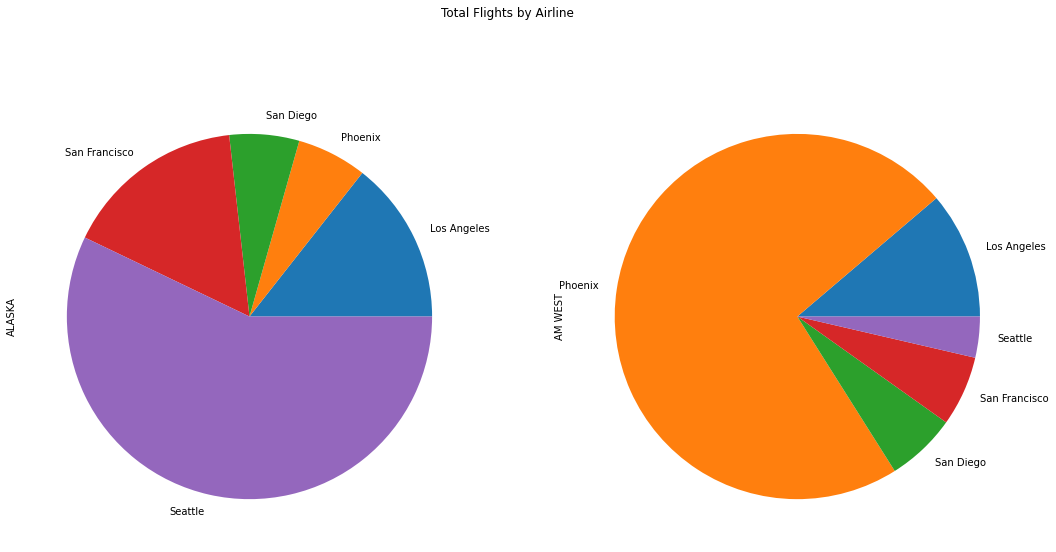

In [125]:
totalFlights.plot.pie(subplots=True, figsize=(18, 9), title='Total Flights by Airline', legend=False)

___

## Calculating delayed percentages based on Airlines

In [140]:
airportData.groupby('Status').sum().sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [61]:
amwestList = airportData['Airlines'] != 'ALASKA'
airportData[amwestList]['Los Angeles'].pct_change(periods=1)

3         NaN
4   -0.831412
Name: Los Angeles, dtype: float64

___

In [47]:
# for index, val in airportData.iteritems():
#    print(index, val)

<AxesSubplot:>

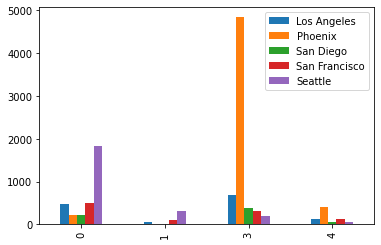

In [48]:
airportData.plot.bar()

<AxesSubplot:>

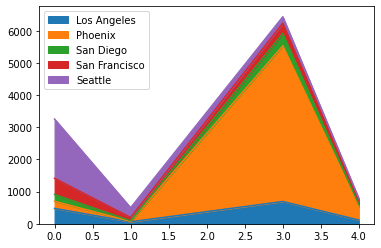

In [20]:
airportData.plot.area()

<AxesSubplot:>

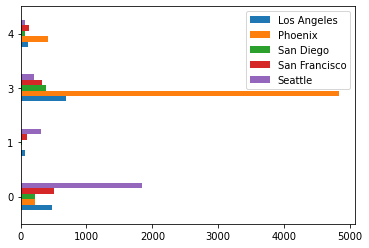

In [21]:
airportData.plot.barh()

<AxesSubplot:>

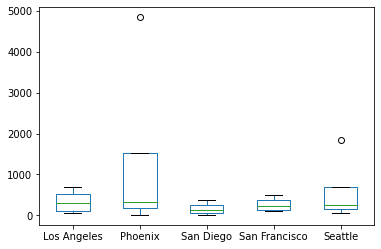

In [22]:
airportData.plot.box()

<AxesSubplot:ylabel='Frequency'>

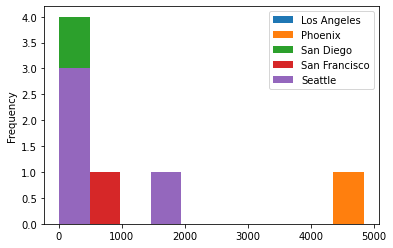

In [23]:
airportData.plot.hist()

<AxesSubplot:>

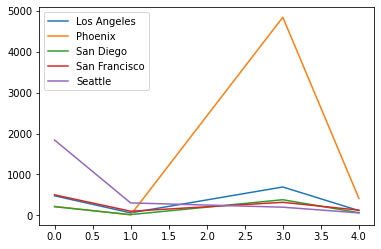

In [24]:
airportData.plot.line()

In [25]:
airportData.plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [26]:
airportData.loc['Airlines'] = airportData['Airlines'] +' '+ airportData['Status']

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc